# K-Means Clustering

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv('iris.csv')
raw_data = data.drop(columns=['species']).copy()

- Removed output to make it unlabeled (raw) data.

In [38]:
raw_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Visualizing the raw data.

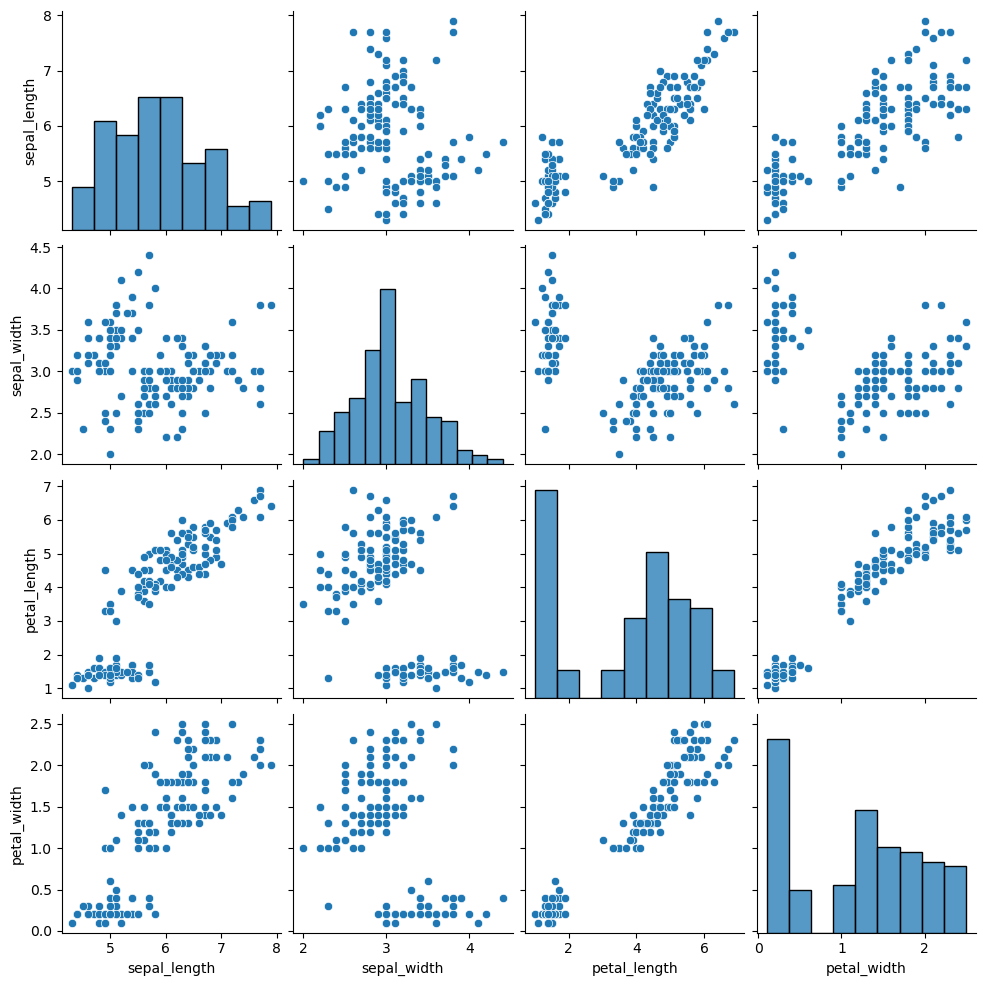

In [39]:
sns.pairplot(data=raw_data)
plt.show()

### Finding best cluster number

In [40]:
from sklearn.cluster import KMeans

In [41]:
wcss = []
 
for i in range(2,21):
    km = KMeans( n_clusters = i, init= "k-means++")
    km.fit(raw_data)
    wcss.append(km.inertia_)

c:\Users\Durjay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Durjay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Durjay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Durjay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

- This code uses the K-Means algorithm to calculate the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters (from 2 to 20).

- **KMeans**: The model is fitted with `n_clusters=8` and `init="k-means++"`, which improves convergence.
- **WCSS Calculation**: The `inertia_` attribute stores the sum of squared distances from each point to its cluster center. This value is appended to the `wcss` list.
- **Purpose**: WCSS helps assess clustering quality. Plotting WCSS for different cluster counts allows using the elbow method to find the optimal number of clusters.


### Finding Elbow point

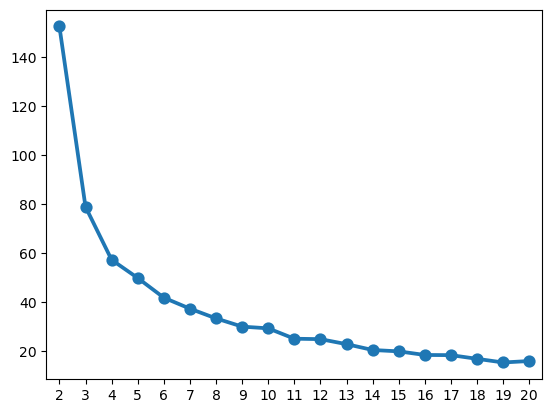

In [42]:
sns.pointplot(x=[i for i in range(2, 21)], y=wcss)
plt.show()

- 3 is the elbow point here :)

### Training model using n_cluster = 3

In [43]:
km = KMeans( n_clusters = 3, init= "k-means++")
km.fit(raw_data)

c:\Users\Durjay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [44]:
raw_data['output'] =km.predict(raw_data)

In [45]:
raw_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,output
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Lets compare predicted output and original output

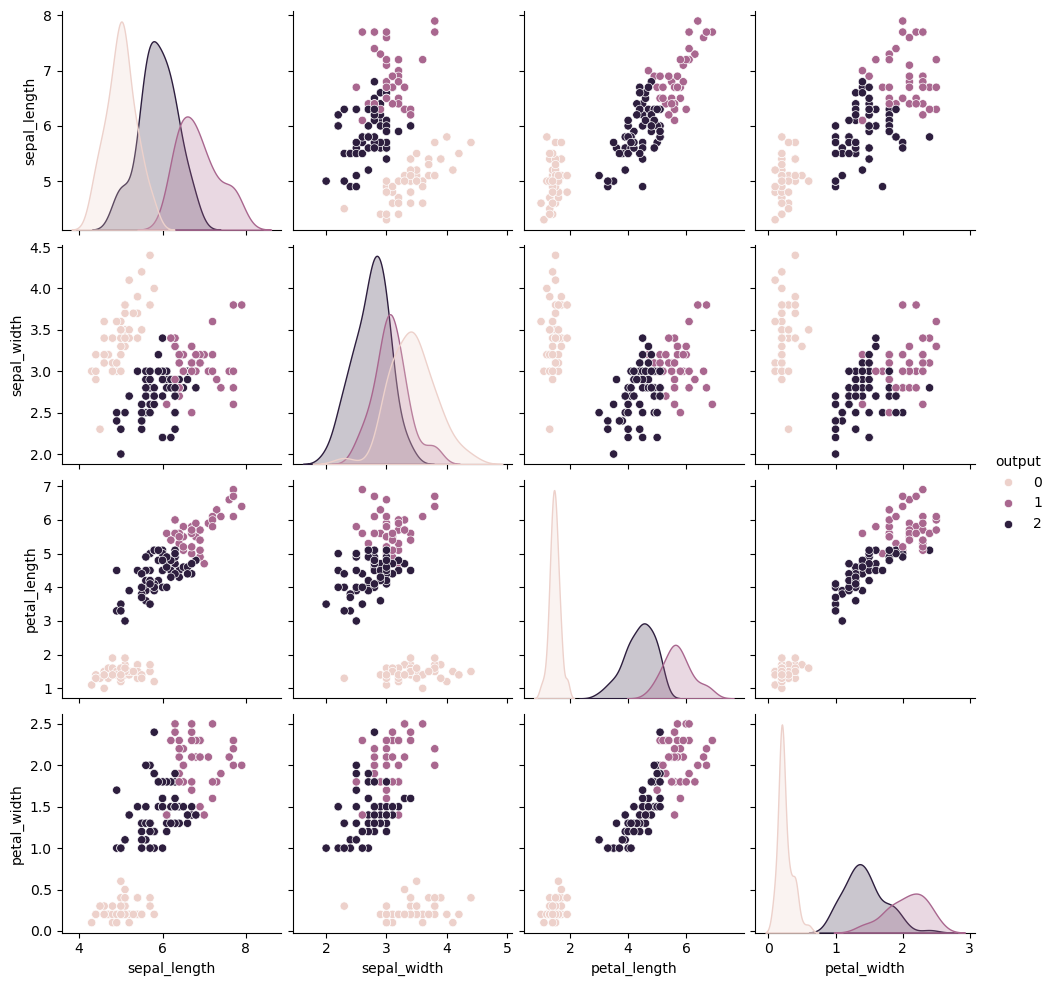

In [46]:
sns.pairplot(data=raw_data, hue='output')
plt.show()

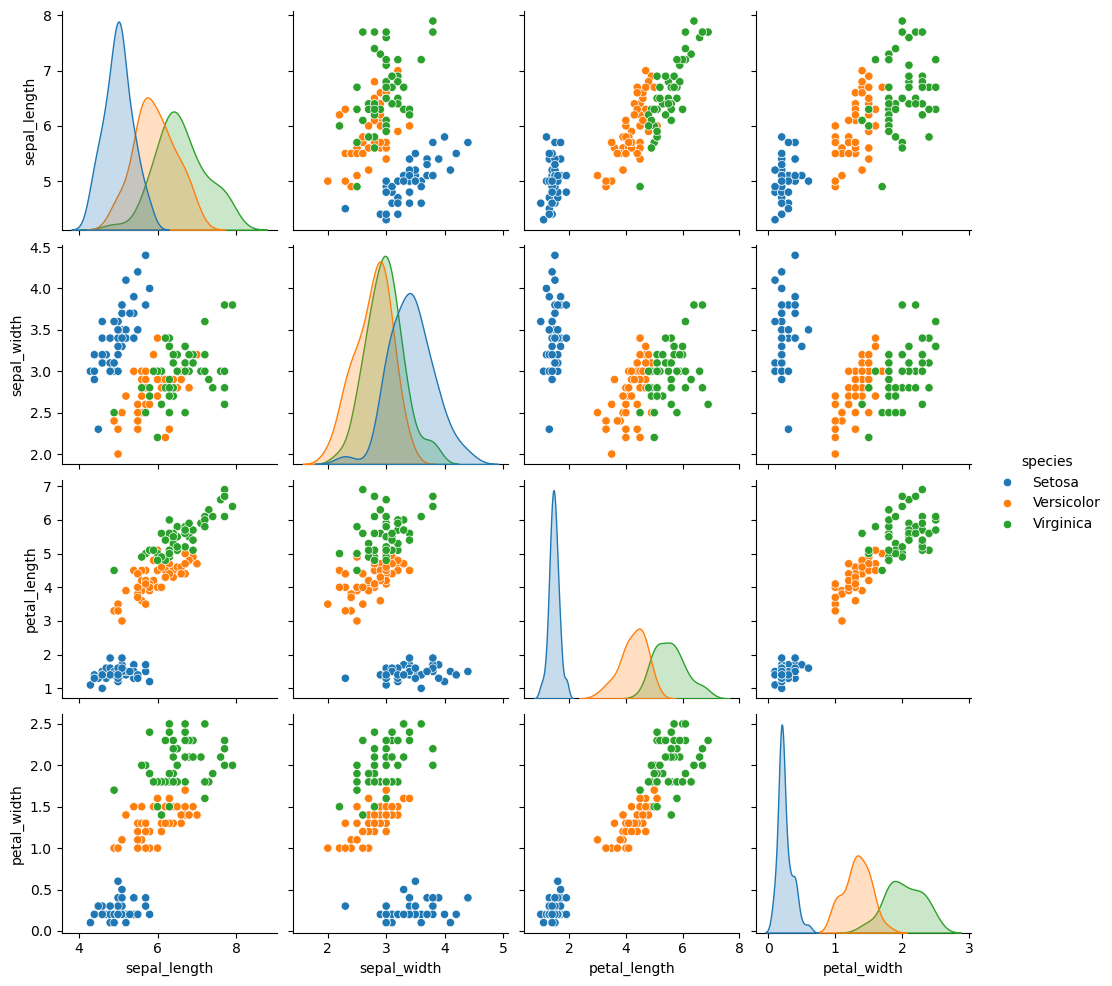

In [48]:
sns.pairplot(data=data, hue='species')
plt.show()

##### We observe that it pridicted- 
- Setosa : 0
- Virginica : 1 
- Versicolor : 2

with good accuracy